In [3]:
import pandas as pd
import numpy as np

euk = pd.read_csv("eukaryotes.tsv ", sep = "\t")
my_types = {
    "Species": "string",
    "Kingdom": "string",
    "Class": "string",
    "Assembly status": "string",
    "Number of genes": "Int64",
    "Number of proteins": "Int64",
}

euk = pd.read_csv("eukaryotes.tsv", sep = "\t", dtype = my_types, na_values = ["-"])
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5000,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.0470,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2000,<NA>,<NA>,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,<NA>,<NA>,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,<NA>,<NA>,2018,Chromosome


In [5]:
# Five animal classes with the most sequenced genomes

euk[euk["Kingdom"] == "Animals"]["Class"].value_counts().head(5)

Mammals          658
Insects          602
Fishes           282
Other Animals    210
Birds            172
Name: Class, dtype: Int64

In [38]:
# Genome size and number of genes for reptiles

selected = euk[euk["Class"] == "Reptiles"].dropna()
selected[["Species", "Size (Mb)", "Number of genes"]]

,Species,Size (Mb),Number of genes
282,Anolis carolinensis,1799.14,22092
565,Pogona vitticeps,1716.68,21445
944,Chrysemys picta bellii,2365.77,25289
1122,Chelonia mydas,2208.41,22336
1136,Alligator mississippiensis,2161.73,25012
1150,Crocodylus porosus,2049.54,19551
1218,Notechis scutatus,1665.53,22413
1248,Pelodiscus sinensis,2202.48,24516
1376,Thamnophis sirtalis,1424.90,20101
1513,Python bivittatus,1435.05,21877


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#charts will be shown live in the document

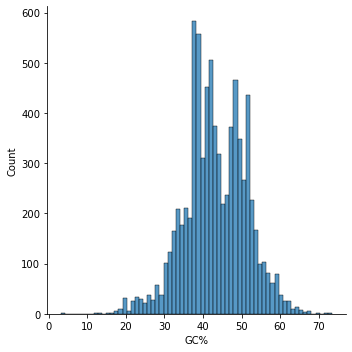

In [54]:
df = euk["GC%"].dropna()
sns.displot(euk["GC%"].dropna())

# displot can't deal with missing data

Text(0.5, 1.0, 'GC percentage')

<Figure size 576x288 with 0 Axes>

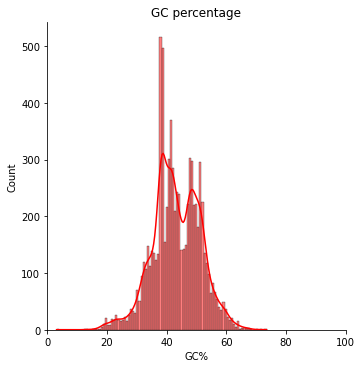

In [70]:
plt.figure(figsize=(8,4)) # set the shape of the plot

sns.displot(
    euk["GC%"].dropna(),
    color="red",
    bins=100,  # set the number of bins
    kde=True  # calculate KDE
)

# set the x limit between 0 and 100 for a percentage
plt.xlim((0, 100))

plt.title("GC percentage")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0.5, 1.0, 'GC percentage')

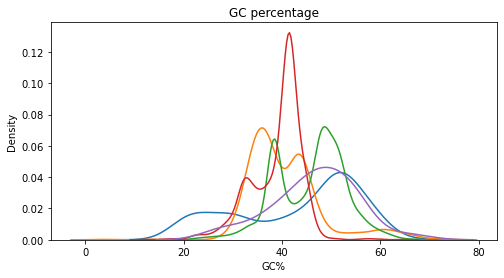

In [75]:
plt.figure(figsize=(8,4))

list_kigdoms=euk["Kingdom"].unique()

for kingdom in list_kigdoms:
    one_kingdom = euk[euk["Kingdom"] == kingdom]
    sns.distplot(one_kingdom["GC%"].dropna(), hist=False, label=kingdom)
    
plt.title("GC percentage")

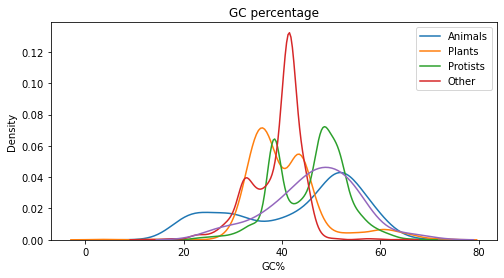

In [90]:
plt.figure(figsize=(8,4))

list_kigdoms=euk["Kingdom"].unique()

for kingdom in list_kigdoms:
    one_kingdom = euk[euk["Kingdom"] == kingdom]
    sns.kdeplot(data=one_kingdom["GC%"].dropna())
    
plt.title("GC percentage")
#plt.legend(["Animals", "Plants", "Protists", "Other"])

<AxesSubplot:xlabel='GC%', ylabel='Density'>

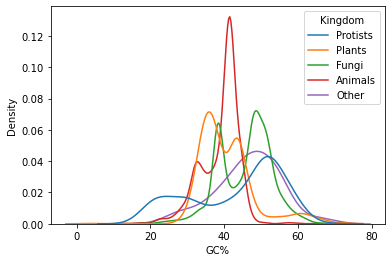

In [134]:
#df_plot = euk[~euk["GC%"].isnull()]
#df_plot

df_plot = euk[euk["GC%"].notnull()]

sns.kdeplot(data=df_plot, x='GC%', hue='Kingdom', common_norm=False)
#sns.kdeplot(data=euk, x='GC%', hue='Kingdom')

<AxesSubplot:xlabel='GC%', ylabel='Density'>

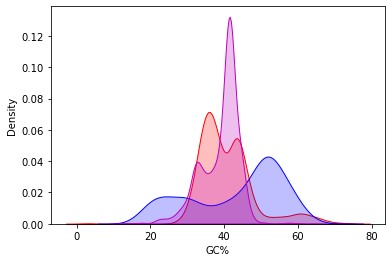

In [133]:
#df_plot = euk[(euk["Kingdom"]=="Plants") & (euk["GC%"].notnull())]
#df_plot2 = euk[(euk["Kingdom"]=="Protists") & (euk["GC%"].notnull())]
#df_plot

sns.kdeplot(data=euk[(euk["Kingdom"]=="Plants") & (euk["GC%"].notnull())], x="GC%", shade=True, color="r")
sns.kdeplot(data=euk[(euk["Kingdom"]=="Protists") & (euk["GC%"].notnull())], x="GC%", shade=True, color="b")
sns.kdeplot(data=euk[(euk["Kingdom"]=="Animals") & (euk["GC%"].notnull())], x="GC%", shade=True, color="m")

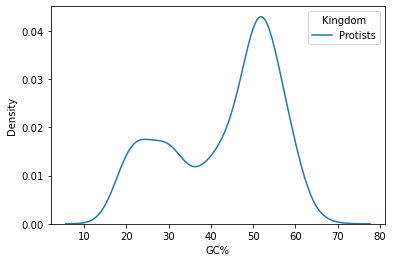

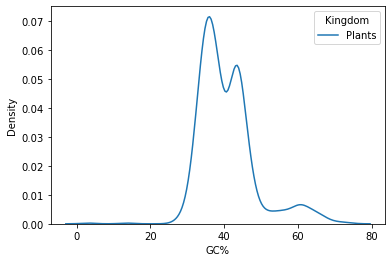

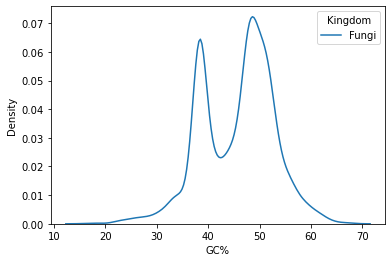

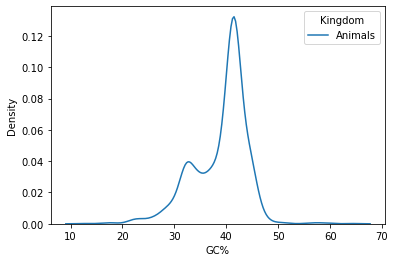

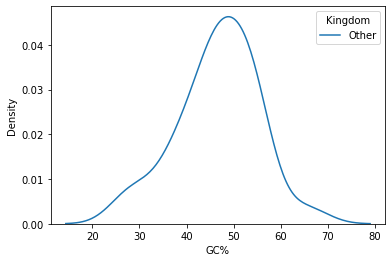

In [97]:

list_kigdoms=euk["Kingdom"].unique()

for kingdom in list_kigdoms:
    plt.figure()
    df_plot = euk[(euk['Kingdom']==kingdom) & ~euk["GC%"].isnull()]
    sns.kdeplot(data=df_plot, x='GC%', hue='Kingdom')
    #sns.kdeplot(data=one_kingdom["GC%"].dropna())

Text(0.5, 1.0, 'Genome size vs number of genes/n for all genomes')

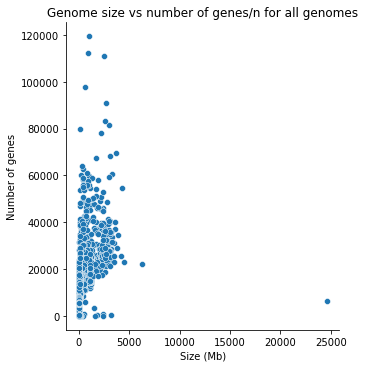

In [135]:
sns.relplot(data=euk, x="Size (Mb)", y="Number of genes")
plt.title("Genome size vs number of genes/n for all genomes")

# relplot ignores missing data, no need to filter

Text(0.5, 1.0, 'Genome size vs number of genes/n for all genomes < 6000 Mb')

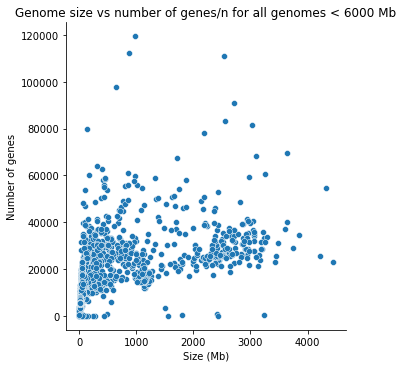

In [137]:
# filter to exclude outliers 

sns.relplot(data=euk[euk["Size (Mb)"] < 6000], x="Size (Mb)", y="Number of genes")
plt.title("Genome size vs number of genes/n for all genomes < 6000 Mb")

Text(0.5, 1.0, 'Genome size vs number of genes/n for animal genomes')

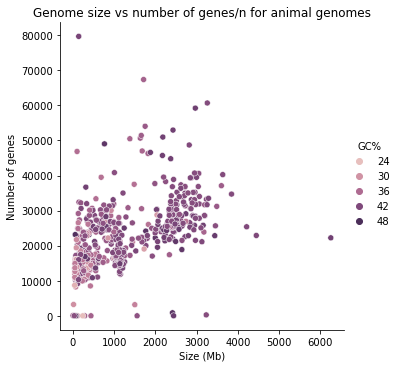

In [138]:
animals = euk[euk["Kingdom"] == "Animals"].dropna()
sns.relplot(data=animals, x="Size (Mb)", y="Number of genes", hue="GC%")
plt.title("Genome size vs number of genes/n for animal genomes")

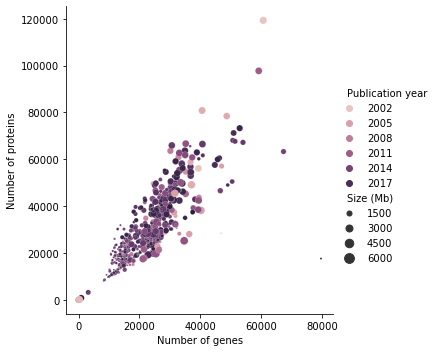

In [144]:
# Number of genes vs number of proteins

sns.relplot(data=animals, x="Number of genes", y="Number of proteins", size="Size (Mb)", sizes=(2,100), hue="Publication year")

Text(0.5, 1.0, 'Genome size vs gene density/for animal genomes')

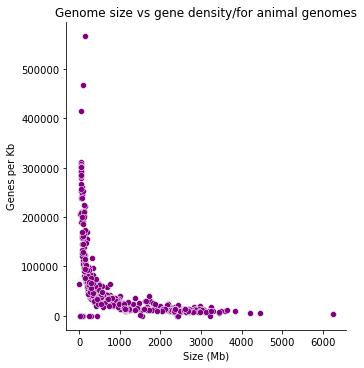

In [145]:
# Plotting gene density

# Create gene density column
animals["Genes per Kb"] = animals["Number of genes"]/animals["Size (Mb)"] * 1000

sns.relplot(data=animals, x="Size (Mb)", y="Genes per Kb", color="purple")
plt.title("Genome size vs gene density/for animal genomes")